# Приложение к курсовой работе
> Душаков Н, ПМ3-4

Данный код иллюстрирует, как можно проводить идентификацию и распознавание лиц в видео, используя технологию  **face_net**

In [1]:
from facenet_pytorch import MTCNN
import torch
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display

#### Если доступна дискретная видеокарта, переложим вычисления на нее:

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Вычисления производятся на: {}'.format(device))

Вычисления производятся на: cpu


In [3]:
mtcnn = MTCNN(keep_all=True, device=device)

## Загрузим видео


In [4]:
video = mmcv.VideoReader('video.mp4')
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

display.Video('video.mp4', width=800)

#### Прогоним видео через MTCNN


Будем итерироваться по каждому видеокару, находить лица ивыделять их прямоугольниками:

In [5]:
frames_tracked = []
for i, frame in enumerate(frames):
    print(f'\rКадр: {i+1}', end='')
    
    # Распознаем лица
    boxes, _ = mtcnn.detect(frame)
    
    # Выделяем их 
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    for box in boxes:
        draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
    
    # Добавляем в список распознанных
    frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))
print('\nГотово')

Кадр: 105
Готово


#### Отобразим полученный результат:

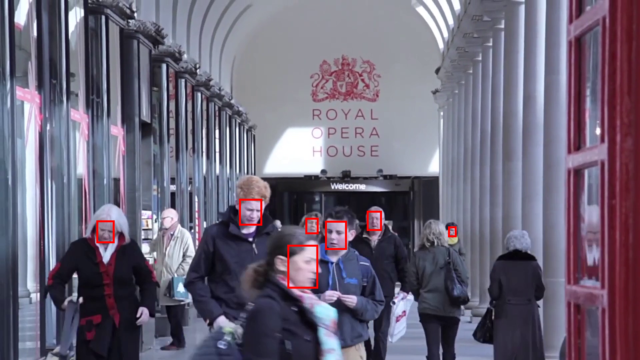

In [17]:
d = display.display(frames_tracked[0], display_id=True)

i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
#         print(d)
except KeyboardInterrupt:
    pass